# DSCI 100 Project Report

Geoff Jiang \
University of British Columbia \
71202527 \
DSCI 100  
Dr. Daniel Chen 
 
## Introduction



This project focuses on analyzing the Heart Disease dataset from the UC Irvine Machine Learning Repository in 1988 (Janosi et al., 1988). The dataset includes information from four regions: Cleveland, Hungary, Switzerland, and the VA Long Beach. Although it contains 76 attributes, only 14 are commonly used, primarily related to symptoms and factors associated with heart disease. The goal of this project is to determine whether resting blood sugar, serum cholesterol, ST depression, maximum heart rate, and age can predict the presence of heart disease in a patient. Additionally, it aims to identify the combination or number of predictors that yield the most accurate results. For this study, I chose to analyze the Cleveland database because it is more frequently used by researchers and has fewer missing data entries.


## Method and Results
When deciding which predictors to use for this project, a few columns stood out and I decided to research them further. Below is a short list of columns of interest and why I decided to use them:


**Resting blood pressure** - On admission to the hospital, measured in mm Hg. 

**Serum cholestrol** - Total blood cholesterol, measures the amount of certain lipids in your blood. 

**ST depression** - induced by exercise, measured relative to rest. 



Specifically, high blood pressure can damage arteries in the body and allow plaque to build up which in turn can cause chest pains and symptoms of heart disease (American Heart Association, 2024). As well, measuring serum cholesterol helps doctors determine the risk of developing heart disease in the next 10 years (Huizen, 2021). Additionally, ST depression may indicate signs of severe coronary lesions and other heart-related problems (Fletcher, 2022). These columns specifically were taken into account when choosing the predictors for this project. Age may also potentially be a relevant predictor as bodily functions slow down when the body ages. 

To conduct this project, I will use the K-nearest-neighbors classification algorithm to diagnose heart disease based on the predictors listed above. To find the optimal number of predictors for the most accurate results, I will use forward selection, where I assess the accuracy using one predictor, then two, and so on until all five are used. While the textbook has a detailed approach involving loops to conduct forward selection and the best order of predictors, for the sake of simplicity, I will instead randomly choose the predictors to add on next. Five-fold cross-validation will be used on all classification models to determine the best value of K. To visualize the results, a line graph of accuracy vs number of predictors will evaluate whether all factors can predict the presence of heart disease and identify the best combination of predictors.



To start, we load the dataset into R via an external GitHub link and rename the columns (Figure 1).




In [1]:
#load tidyverse and tidymodel packages
library(tidyverse)
library(tidymodels)

#read data through an external public github link and rename columns
url <- "https://raw.githubusercontent.com/Khaedra/ProjectProposal/main/data/heart_disease/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = FALSE) |>
rename(Age = X1, Sex = X2, Chest_Pain = X3, Resting_Blood_Pressure = X4, Serum_Cholesterol = X5, Fasting_Blood_Sugar = X6, Electrocardiograph = X7, 
       Max_Heart_Rate = X8, Angina = X9, ST_depression = X10, Slope_Exercise = X11, Major_Vessels = X12, Thal = X13, Diagnosis = X14)

cleveland_data

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Age,Sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Electrocardiograph,Max_Heart_Rate,Angina,ST_depression,Slope_Exercise,Major_Vessels,Thal,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Figure 1

We can see that the data is already in a tidy format and contains 303 rows. Next, I will select only the columns that will be used in the data analysis and mutate the Diagnosis column to only display the presence or absence of heart disease. The study explains that any value other than 0 indicates presence. After, I will split the data into testing (70%) and training (30%) sets. Figure 2 shows a summary of the ratio of diagnosis' in the training set.


In [2]:
#set seed
set.seed(55)

#selecting columns
cleveland_data <- cleveland_data |>
select(Age, Resting_Blood_Pressure, Serum_Cholesterol, ST_depression, Max_Heart_Rate, Diagnosis) |>

#Changing the Diagnosis column
mutate(Diagnosis = case_when(Diagnosis >= 1 ~ "Present", Diagnosis == 0 ~ "Absent")) 


#splitting data
heart_split <- initial_split(cleveland_data, prop = 0.70, strata = Diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#display the ratio of cases in the training set
heart_train_summary <- heart_train |>
group_by(Diagnosis) |>
summarize(count = n())

heart_train_summary

Diagnosis,count
<chr>,<int>
Absent,114
Present,97


Figure 2

Next, I will summarize some key information in the training data including the mean, maximum, and minimum of each column (Figure 3). This will help visualize the range of values and patients we are dealing with. 

In [3]:
mean_table <- heart_train |>
select(- Diagnosis) |>
map(mean) |>
as_tibble() 

min_table <- heart_train |>
select(- Diagnosis) |>
map(min) |>
as_tibble() 

max_table <- heart_train |>
select(- Diagnosis) |>
map(max) |>
as_tibble() 

summary_table <- bind_rows(mean_table, min_table, max_table) |>
mutate(Type = c("Mean", "Min", "Max"))

summary_table

Age,Resting_Blood_Pressure,Serum_Cholesterol,ST_depression,Max_Heart_Rate,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
54.18957,131.0569,245.0806,1.082938,149.8389,Mean
34.00000,94.0000,126.0000,0.000000,71.0000,Min
77.00000,180.0000,409.0000,4.200000,192.0000,Max


Figure 3

Lastly, I will create 2 visualizations that will assist in finding the relationship between the factors chosen. Figure 4 is a scatter plot of ST depression vs Age and Figure 5 is of Max Heart Rate vs Age.


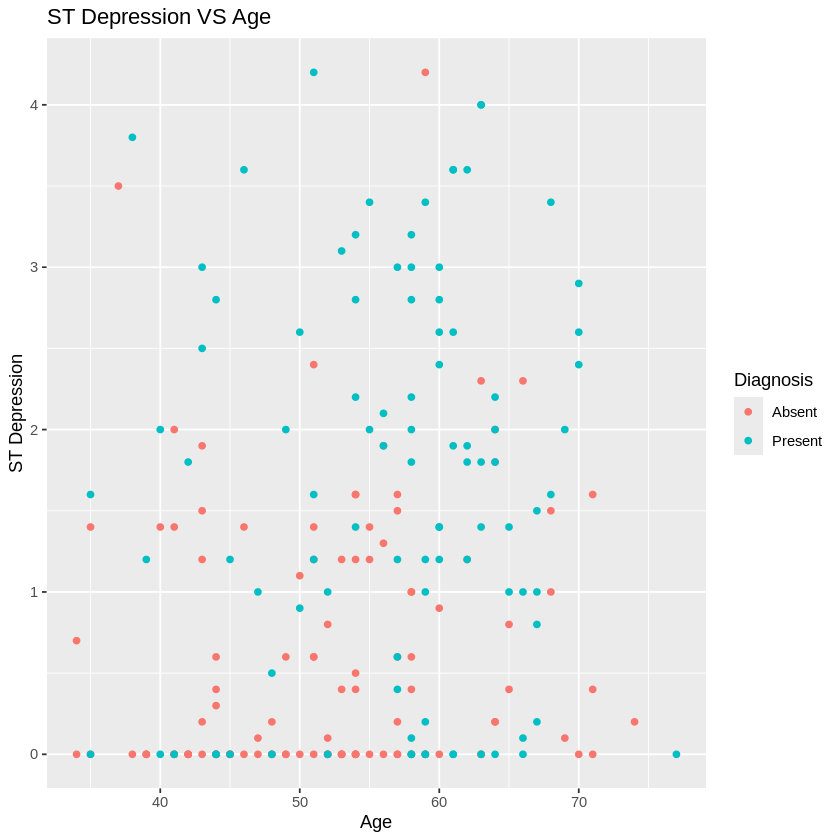

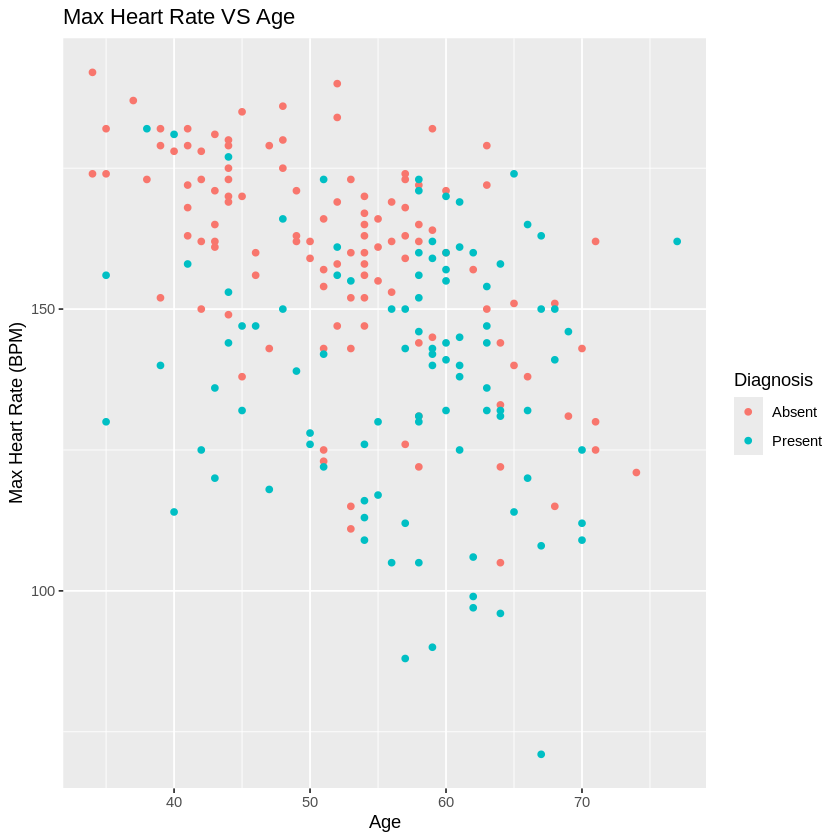

In [4]:
heart_plot <- ggplot(heart_train, aes(x = Age, y = Max_Heart_Rate, color = Diagnosis)) + 
geom_point() + 
labs(title = "Max Heart Rate VS Age", y = "Max Heart Rate (BPM)")


st_plot <- ggplot(heart_train, aes(x = Age, y = ST_depression, color = Diagnosis)) + 
geom_point() + 
labs(title = "ST Depression VS Age", y = "ST Depression")

st_plot
heart_plot

Figure 4 (top) \
Figure 5 (bottom)

As the plots demonstrate, there seems to be a correlation between max heart rate and ST depression indicating heart disease; Patients with lower maximum heart rates and higher ST depression values tend to be diagnosed with heart disease. This is a good indicator that the predictors chosen will yield an acceptable accuracy. 





## Data Analysis

To begin the data analysis, I will start by creating a recipe, K-NN model, and cross-validation template for our data, starting with one predictor. The first model will only use the ST Depression predictor to classify a diagnosis. We must also scale all predictors in every model to ensure equal weighting in the algorithm. As well, we will use the tune function to select the best value of K between 1 and 100. 

In [5]:
set.seed(55)
# K values
kvals <- tibble(neighbors = seq(from = 1, to = 100, by =  5))

#KNN Model
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

# One predictor recipe
heart_recipe1 <- recipe(Diagnosis ~ ST_depression, data = heart_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

# 5 fold cross-validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = Diagnosis)

Next, we put everything into a workflow to conduct the cross-validation and find the best value of K. A plot of acccuracy vs neighbors is included (Figure 6). 

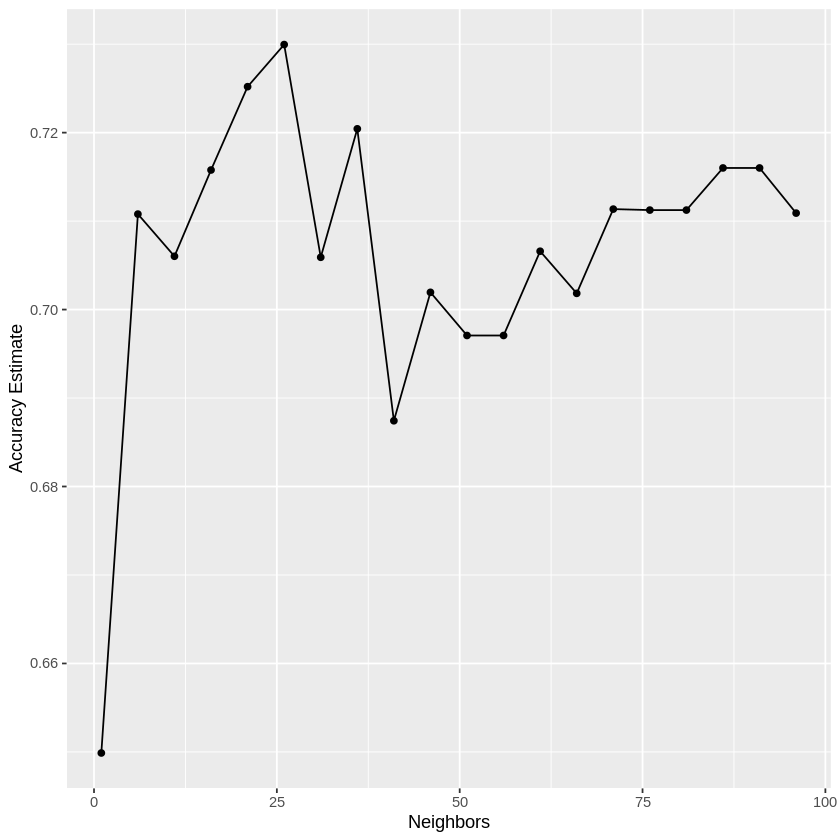

In [6]:
#collecting metrics
heart1_metrics <- workflow() |>
add_recipe(heart_recipe1) |>
add_model(heart_spec) |>
tune_grid(resamples = heart_vfold, grid = kvals) |>
collect_metrics() |>
filter(.metric == "accuracy")

# Plot of Accuracy vs Neighbors

heart1_plot <- ggplot(heart1_metrics, aes(x = neighbors, y = mean)) + 
geom_point() + 
geom_line() + 
ylab("Accuracy Estimate") + 
xlab("Neighbors")

heart1_plot

# Find best value of k
best_k1 <- heart1_metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)


Figure 6

Lastly, we create a new model specification with the ideal amount of neighbors found previously and use our classifier on our testing data. Usually, we would use the metrics() function to summarize the results, but it seems to not work with characters so the results are summarized in Figure 7.  

In [7]:
# New model specification and retrain classifier
heart_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k1) |>
set_engine("kknn") |>
set_mode("classification")

heart1_workflow <- workflow() |>
add_recipe(heart_recipe1) |>
add_model(heart_spec1) |>
fit(data = heart_train)

heart1_predict <- predict(heart1_workflow, heart_test) |>
bind_cols(heart_test) |>
group_by(.pred_class, Diagnosis) |>
summarize(count = n())

heart1_predict

# Accuracy = (45 + 12)/92 = 0.620

`summarise()` has grouped output by '.pred_class'. You can override using the
`.groups` argument.


.pred_class,Diagnosis,count
<fct>,<chr>,<int>
Absent,Absent,45
Absent,Present,30
Present,Absent,5
Present,Present,12


Figure 7

Dividing the total number of correct predictions by the total amount of predictions gives us an accuracy of 62%. It seems that ST Depression alone is not a very good predictor of heart disease. However, let's add more predictors one by one and observe the accuracy. I will follow the same processes as above, but will not include the graph. Here is the process using ST depression and max heart rate as predictors. 

In [8]:
set.seed(55)


# Two predictor recipe
heart_recipe2 <- recipe(Diagnosis ~ ST_depression + Max_Heart_Rate, data = heart_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

#collecting metrics
heart2_metrics <- workflow() |>
add_recipe(heart_recipe2) |>
add_model(heart_spec) |>
tune_grid(resamples = heart_vfold, grid = kvals) |>
collect_metrics() |>
filter(.metric == "accuracy")


# Find best value of k
best_k2 <- heart2_metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

# New model specification and retrain classifier
heart_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k2) |>
set_engine("kknn") |>
set_mode("classification")

heart2_workflow <- workflow() |>
add_recipe(heart_recipe2) |>
add_model(heart_spec2) |>
fit(data = heart_train)

heart2_predict <- predict(heart2_workflow, heart_test) |>
bind_cols(heart_test) |>
group_by(.pred_class, Diagnosis) |>
summarize(count = n())

heart2_predict

# Accuracy = (44 + 18)/92 = 0.674

`summarise()` has grouped output by '.pred_class'. You can override using the
`.groups` argument.


.pred_class,Diagnosis,count
<fct>,<chr>,<int>
Absent,Absent,44
Absent,Present,24
Present,Absent,6
Present,Present,18


Figure 8

From Figure 8, we can see that the accuracy is (44 + 18)/92, which is 67.4%. While this is slightly more effective than using ST depression alone, adding other predictors might further increase the accuracy. Here is the same process, but now with three predictors: Age, Max Heart Rate, and ST Depression.

In [9]:
set.seed(55)

# Three predictor recipe
heart_recipe3 <- recipe(Diagnosis ~  Max_Heart_Rate + ST_depression + Age, data = heart_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

#collecting metrics
heart3_metrics <- workflow() |>
add_recipe(heart_recipe3) |>
add_model(heart_spec) |>
tune_grid(resamples = heart_vfold, grid = kvals) |>
collect_metrics() |>
filter(.metric == "accuracy")


# Find best value of k
best_k3 <- heart3_metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

# New model specification and retrain classifier
heart_spec3 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k3) |>
set_engine("kknn") |>
set_mode("classification")

heart3_workflow <- workflow() |>
add_recipe(heart_recipe3) |>
add_model(heart_spec3) |>
fit(data = heart_train)

heart3_predict <- predict(heart3_workflow, heart_test) |>
bind_cols(heart_test) |>
group_by(.pred_class, Diagnosis) |>
summarize(count = n())

heart3_predict

# Accuracy = (42 + 20)/92 = 0.674

`summarise()` has grouped output by '.pred_class'. You can override using the
`.groups` argument.


.pred_class,Diagnosis,count
<fct>,<chr>,<int>
Absent,Absent,42
Absent,Present,22
Present,Absent,8
Present,Present,20


Figure 9

Interesting! It seems that adding age as a predictor kept our classifier accuracy the same (67.4 %). A neutral change may indicate that age does not have a strong correlation with heart disease. Let's try adding Serum Cholesterol as a 4th predictor and observe the results. 

In [10]:
set.seed(55)

# Four predictor recipe
heart_recipe4 <- recipe(Diagnosis ~ Age + Max_Heart_Rate + ST_depression + Serum_Cholesterol, data = heart_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

#collecting metrics
heart4_metrics <- workflow() |>
add_recipe(heart_recipe4) |>
add_model(heart_spec) |>
tune_grid(resamples = heart_vfold, grid = kvals) |>
collect_metrics() |>
filter(.metric == "accuracy")


# Find best value of k
best_k4 <- heart4_metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

# New model specification and retrain classifier
heart_spec4 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k4) |>
set_engine("kknn") |>
set_mode("classification")

heart4_workflow <- workflow() |>
add_recipe(heart_recipe4) |>
add_model(heart_spec4) |>
fit(data = heart_train)

heart4_predict <- predict(heart4_workflow, heart_test) |>
bind_cols(heart_test) |>
group_by(.pred_class, Diagnosis) |>
summarize(count = n())

heart4_predict

# Accuracy = (36 + 19)/92 = 0.598

`summarise()` has grouped output by '.pred_class'. You can override using the
`.groups` argument.


.pred_class,Diagnosis,count
<fct>,<chr>,<int>
Absent,Absent,36
Absent,Present,23
Present,Absent,14
Present,Present,19


A fourth classifier seems to have brought down our accuracy to 59.8%. Again, this may indicate a weak or insignificant relationship between serum cholestrol and heart disease. Finally, let's add our fifth and final predictor: resting blood pressure. 

In [11]:
set.seed(55)

# Five predictor recipe
heart_recipe5 <- recipe(Diagnosis ~ Age + Max_Heart_Rate + ST_depression + Serum_Cholesterol + Resting_Blood_Pressure, data = heart_train) |>
step_center(all_predictors()) |>
step_scale(all_predictors())

#collecting metrics
heart5_metrics <- workflow() |>
add_recipe(heart_recipe5) |>
add_model(heart_spec) |>
tune_grid(resamples = heart_vfold, grid = kvals) |>
collect_metrics() |>
filter(.metric == "accuracy")


# Find best value of k
best_k5 <- heart5_metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

# New model specification and retrain classifier
heart_spec5 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k5) |>
set_engine("kknn") |>
set_mode("classification")

heart5_workflow <- workflow() |>
add_recipe(heart_recipe5) |>
add_model(heart_spec5) |>
fit(data = heart_train)

heart5_predict <- predict(heart5_workflow, heart_test) |>
bind_cols(heart_test) |>
group_by(.pred_class, Diagnosis) |>
summarize(count = n())

heart5_predict

# Accuracy = (36 + 23)/92 = 0.641

`summarise()` has grouped output by '.pred_class'. You can override using the
`.groups` argument.


.pred_class,Diagnosis,count
<fct>,<chr>,<int>
Absent,Absent,36
Absent,Present,19
Present,Absent,14
Present,Present,23


With 5 predictors, our accuracy jumps back up to 64.1%. Although resting blood pressure seems to be a positive indicator of heart disease, a different combination of predictors may yield even better results. As alluded to earlier, a proper forward selection algorithm would find the optimal predictor to add next. However, using the data we gathered, we may still be able to draw a conclusion from these 5 models. Figure 10 demonstrates a bar plot of accuracy vs predictors. 

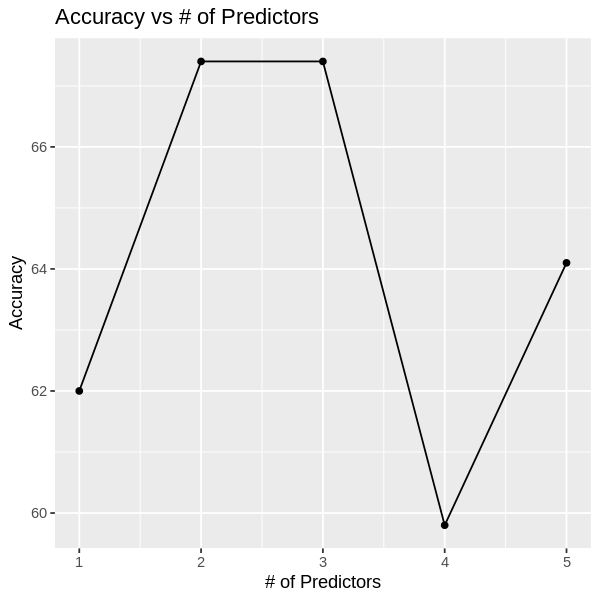

In [12]:
accuracysum <- tibble(predictors = 1:5, accuracy = c(62, 67.4, 67.4, 59.8, 64.1))

options(repr.plot.height = 5, repr.plot.width = 5)
accuracyplot <- ggplot(accuracysum, aes(x = predictors, y = accuracy)) + 
geom_point() + 
geom_line() + 
labs(title = "Accuracy vs # of Predictors", x = "# of Predictors", y = "Accuracy")


accuracyplot

Figure 10

As shown, a combination of ST depression and max heart rate or ST depression, max heart rate, and age seems to yield the most effective results. 

## Discussion

Overall, my findings seem to suggest that the predictors chosen can predict the presence of heart disease within a patient. However, another question we should address is whether a maximum accuracy of 67.4% is good enough. In the realm of medical science, it is extremely important to be sure whether a disease is present to ensure the right people receive aid. Realistically, it would not be outrageous to say that an accuracy of 67.4% is unacceptable. While these indicators are associated with heart disease, perhaps just five isn't enough.  The inclusion of other predictors such as the electrocardiograph and the presence of Thalassemia blood disorder, both of which are associated with signs of heart disease, may further boost the reliability of our model. Even other factors not listed in the original data such as obesity and blood sugar can be included in future studies and be examined for relationships.

Nonetheless, the findings may have potentially profound significance in the field of medicine and health. We have revealed that a combination of age, ST depression, heart rate, blood pressure, and serum cholesterol are satisfactory predictors of heart disease and can be used with confidence when only this information is available. Still, it should not be a decisive diagnosis but rather a reinforcing or guiding one. As well, this project may potentially inspire future studies that examine the connection between these factors and heart disease more deeply or discover other predictors that possess a stronger link. 

As alluded to earlier in the project, there are still other branches of this project to explore. Namely, discovering the best predictor or combination of (not just using 5 but all 14) can be the subject of other studies. As well, we may want to discover whether this trend is similar across all databases, not just Cleveland. Those results may paint a picture of the different trends in health around the world. Furthermore, one may want to examine if these results are the same now in 2024 since this data is relatively old. Other questions such as whether gender influences heart disease can also be explored from the results of this project. Overall, the factors and trends associated with heart disease are important and will continue to be significant now and in the future.


## References

Fletcher, J. (2022, September 29). St segment depression: Definition, causes, treatments. Medical News Today. https://www.medicalnewstoday.com/articles/st-segment- \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;depression#:~:text=ST%20segment%20depression%20typically%20indicates,involve%20medication%20and%20lifestyle%20changes. 

Health threats from high blood pressure. www.heart.org. (2024, May 6). https://www.heart.org/en/health-topics/high-blood-pressure/health-threats-from-high-blood-pressure 


Huizen, J. (2021, September 22). Serum cholesterol: What to know and how to manage levels. Medical News Today. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.medicalnewstoday.com/articles/321519#:~:text=A%20person’s%20serum%20cholesterol%20level%20comprises%20the%20amount%20of%20high,
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;conditions%20such%20as%20heart%20disease. 


Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

